# Crime Analysis and Mapping with Folium
## IDS Assignment - 03

- Name: `Abdullah Arif`

- Class: `BS-DS 3A`

- Roll no: `22L-7764`

- Due date: `30/11/2023`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium import GeoJson
from folium.plugins import MarkerCluster
from shapely.geometry import Point

In [4]:
df = pd.read_csv("crimes_dataset.csv")

In [5]:
df.shape

(5508, 13)

In [6]:
df.head(5)

,ID,CASENO,OFFENSE,CVLEGEND,CVDOW,Block_Location,BLKADDR,City,State,Day,Lat,Lon,timestamp
0,0.0,17091420.0,BURGLARY AUTO,BURGLARY - VEHICLE,0.0,"2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...",2500 LE CONTE AVE,Berkeley,CA,Sunday,37.876965,-122.260544,23/07/2017 6:00
1,1.0,17020462.0,THEFT FROM PERSON,LARCENY,4.0,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA,Thursday,37.869363,-122.268028,13/04/2017 8:45
2,2.0,17050275.0,BURGLARY AUTO,BURGLARY - VEHICLE,4.0,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865491, ...",200 UNIVERSITY AVE,Berkeley,CA,Thursday,37.865491,-122.310065,24/08/2017 18:30
3,3.0,17019145.0,GUN/WEAPON,WEAPONS OFFENSE,4.0,"1900 SEVENTH ST\nBerkeley, CA\n(37.869318, -12...",1900 SEVENTH ST,Berkeley,CA,Thursday,37.869318,-122.296984,6/4/2017 17:30
4,4.0,17044993.0,VEHICLE STOLEN,MOTOR VEHICLE THEFT,2.0,"100 PARKSIDE DR\nBerkeley, CA\n(37.854247, -12...",100 PARKSIDE DR,Berkeley,CA,Tuesday,37.854247,-122.243750,1/8/2017 18:00


## The most frequently committed crime:

In [7]:
df['Date'] = pd.to_datetime(df['timestamp'])

crime_mode = df.OFFENSE.mode()[0] # =  df.OFFENSE.value_counts().idxmax()
category_crime_mode = df.CVLEGEND.mode()[0] # =  df.CVLEGEND.value_counts().idxmax()
crime_mode_count = df.OFFENSE.value_counts()[0]
category_crime_mode_count = df.CVLEGEND.value_counts()[0]

total_crimes = df.OFFENSE.value_counts().sum()
total_categories_crimes = df.CVLEGEND.value_counts().sum()
total_crimes = df.OFFENSE.value_counts().sum()

earliest_occurrence = df[df.OFFENSE == crime_mode]['Date'].min()
latest_occurrence = df[df.OFFENSE == crime_mode]['Date'].max()

ratio_most_frequent_crime = (crime_mode_count / total_crimes *100)
print("1. Most Common Crime:",crime_mode)
print("   Count: ", crime_mode_count)
print("2. Crime's Category:",category_crime_mode)
print(f"3. Ratio: {ratio_most_frequent_crime:.2f}%")
print(f"4. Time span: from {earliest_occurrence} to {latest_occurrence}.")


1. Most Common Crime: BURGLARY AUTO
   Count:  379
2. Crime's Category: LARCENY
3. Ratio: 18.95%
4. Time span: from 2017-01-04 12:00:00 to 2017-12-08 14:30:00.


   index                CVLEGEND  Count
0     10                 LARCENY    427
1      5      BURGLARY - VEHICLE    379
2     19               VANDALISM    163
3      6      DISORDERLY CONDUCT    139
4      2                 ASSAULT    124
5     14     MOTOR VEHICLE THEFT    106
6      9                   FRAUD    102
7      4  BURGLARY - RESIDENTIAL    100
8      7          DRUG VIOLATION     99
9     17                 ROBBERY     68


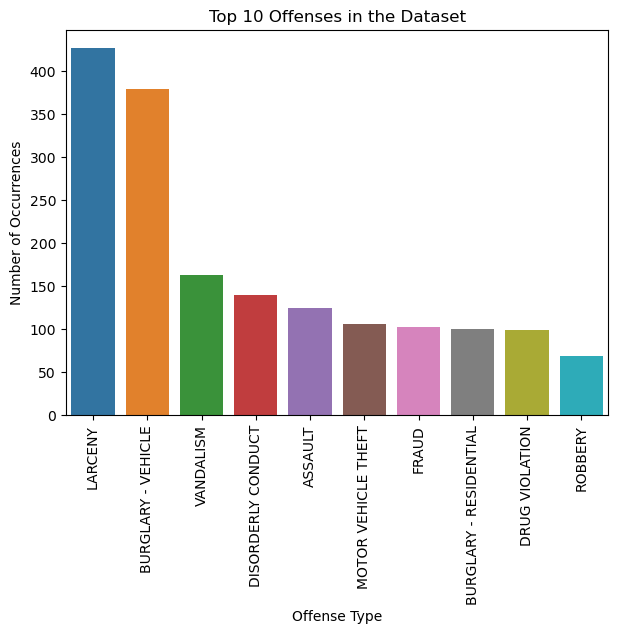

In [8]:
offense_counts = df.groupby("CVLEGEND").size().reset_index(name="Count")
offense_counts = offense_counts.sort_values(by = "Count",ascending=False).reset_index()
print(offense_counts.head(10))

plt.figure(figsize=(7,5))
sns.barplot(x="CVLEGEND", y="Count", data=offense_counts.head(10))
plt.xticks(rotation=90)
plt.xlabel("Offense Type") 
plt.ylabel("Number of Occurrences")
plt.title("Top 10 Offenses in the Dataset")
plt.show()

## Distribution of crimes accross different week days

In [9]:
print("Most crimes: ",df.Day.mode()[0])
print("Least crime: ",df.Day.value_counts().idxmin())
df.Day.value_counts()

Most crimes:  Friday
Least crime:  Sunday


Friday       315
Thursday     298
Tuesday      292
Monday       287
Saturday     287
Wednesday    276
Sunday       245
Name: Day, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Count'>

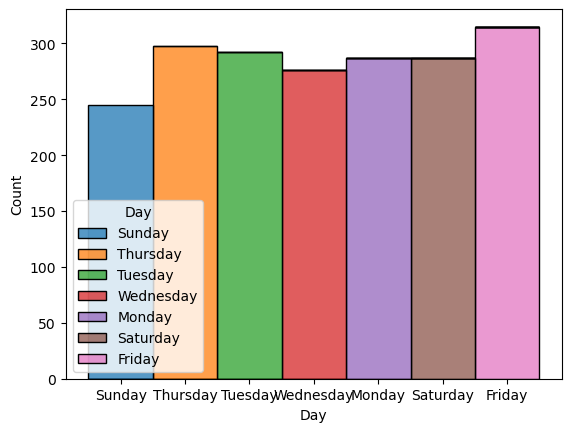

In [10]:
df_days = df[["Day", "OFFENSE","CVLEGEND","CVDOW"]]
sns.histplot(data=df, x="Day", hue="Day", multiple="stack")

## Geographical locations with highest crime rate

In [11]:
print("Block locations: ", df.Block_Location.mode()[0])

Block locations:  2100 SHATTUCK AVE
Berkeley, CA
(37.871167, -122.268285)


In [12]:
print("Block Address: ", df.BLKADDR.mode()[0])

Block Address:  2100 SHATTUCK AVE


In [13]:
print("Latitude: ", df.Lat.mode()[0],"Longitude: ", df.Lon.mode()[0])

Latitude:  37.871167 Longitude:  -122.268285


## Folium

In [14]:

geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Save to GeoJSON file
geo_df.to_file("crime_data.geojson", driver='GeoJSON')
m = folium.Map(location=[df['Lat'].mean(), df['Lon'].mean()], zoom_start=14)
geojson_layer = GeoJson('crime_data.geojson')
geojson_layer.add_to(m)
# Display the map
display(m)

In [15]:
# Assuming your dataset is stored in a variable called 'crime_data'
# Extracting relevant information
df_folium = df.dropna(how = "any")
locations = df_folium[['Lat', 'Lon']]
offense_types = df_folium['OFFENSE']
occurrence_count = len(df_folium)

# Create a base map centered around the average coordinates of the dataset
m = folium.Map(location=[locations['Lat'].mean(), locations['Lon'].mean()], zoom_start=14)
geojson_layer = GeoJson('map_fast.geojson')
geojson_layer.add_to(m)
# Display the map
display(m)

marker_cluster = MarkerCluster().add_to(m)

# Add each point to the MarkerCluster
for index, location in locations.iterrows():
    folium.Marker(
        location=[location['Lat'], location['Lon']],
        popup=f"Offense Type: {offense_types[index]}",
        icon=None,
    ).add_to(marker_cluster)

# Display the map
m.save('crime_map.html')
